# **Applied Statistics Assessment Notebook - Problems and Solutions**

## **Notebook Overview**
___

This workbook contains four major sections, one related to each of the four problems provided to students as part of the coursework for 25-26: 8651 -- APPLIED STATISTICS:
- *Problem 1: Extending the Lady Tasting Tea*
- *Problem 2: Normal Distribution*
- *Problem 3: t-Tests*
- *Problem 4: ANOVA*

The full problem description is provided at the start of each section, followed by the solution to the problem and its associated questions.

Each problem is addressed entirely within its own section. Each problem starts with a level 2 markdown heading, with the problem outline and "Answering the Problem" parts of each section begining with a level 3 markdown heading. To further try and clarify the difference between each section, all of the different porblems are also seperated by two line breaks, one directly after the other. Each problem section also starts with a picture, to make it easier for the reader to identify when they've reached a new problem while quickly scrolling down.

As each problem contains multiple sub-problems, the responses have been broken up into multiple sub-sections addressing different aspects of the questions related to each problem. A breakdown of the sub-sections for each problem is available at the start of each "Answering the Problem" section for each problem.

In [153]:
# Libraries used in this notebook

import math # mathmatical functions
import itertools # permutations and combinations
import random # random selections
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate # table formatting
import scipy.stats as stats # Statistical models.
import statsmodels as sm # Statistics.
from scipy.stats import ttest_ind # scipy's built in t-test function
import pandas as pd

---
---

## **Problem 1: Extending the Lady Tasting Tea**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Nice_Cup_of_Tea.jpg/960px-Nice_Cup_of_Tea.jpg" alt="Tea Set" style="width: 600px; height: 400px;">

<small>By Vanderdecken - Author's original own work, Public Domain, https://commons.wikimedia.org/w/index.php?curid=1613904<small>

---
### **Problem 1: Extending the Lady Tasting Tea**
---
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.


---
### **Answering the Problem**
---

In order to answer this problem, there are three things we need to address:

1. The estimated probability of the original 8-cup experiment
2. The estimated probability of the new 12-cup experiment
3. How the two compare with one another

---
#### 1. Running the Original Experiment
---

Let's start off by re-running the original experiment and determining it's probability. First we need to flag the number of cups involved in the experiment.

In [154]:
# Total number of cups
no_cups  = 8

# Number of cups with tea-first
cups_tea = 4

# Number of cups with tea-first
cups_milk = 4


Next we need label the various types of cups, so that we can determine the overall number of ways four cups (at this stage any four cups) could be selected out of that total.

In [155]:
# Label the cups
labels = list(range(no_cups))

# Show the different ways of selecting cups_milk out of no_cups
combs = list(itertools.combinations(labels, cups_milk))
print("The maximum number of cup combinations is",len(combs))

The maximum number of cup combinations is 70


Now we want to label four specic cups as the cups which had milk put in them first.

In [156]:
# Select four cups at random to put milk in and then sort those labels so that they mirror the iterated data in combs
labels_milk = random.sample(labels, 4)
labels_milk.sort()
set(labels_milk)

{0, 2, 3, 4}

With the milk cups labelled, we can now start to look at how often these cups will be selected at random. To do this, we look at every single combination of cup selections and identify which of those include cups labelled as milk first cups and how many milk first cups they include. 

In [157]:
# Create a list to store the overlap between each element of combs and labels_milk.
no_overlaps = []

# loop through combinations
for comb in combs:
    s1 = set(comb)
    s2 = set(labels_milk)
    # Figure out where they overlap
    overlap = s1.intersection(s2)
    #Append overlap to no_overlaps
    no_overlaps.append(len(overlap))

# Count the number of times each overlap occurs.
counts= np.unique(no_overlaps, return_counts=True)

We can now chart the results of the above analysis to see the breakdown of the the amount of milk first cups in each possible combination of cups (e.g. of the 70 possible cup combinations, how many of these combinations include 0,1,2,3 or 4 milk first cups?).

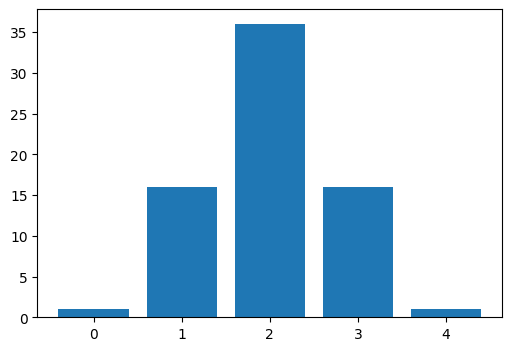

In [158]:
# Chart for the orginal experiment
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(counts[0],counts[1]);

In [159]:
# Prepare data for tabulation
data = list(zip(*counts))
headers = ["Overlap Count", "Frequency"]
print(tabulate(data, headers=headers,tablefmt="grid")) 

+-----------------+-------------+
|   Overlap Count |   Frequency |
+=================+=============+
|               0 |           1 |
+-----------------+-------------+
|               1 |          16 |
+-----------------+-------------+
|               2 |          36 |
+-----------------+-------------+
|               3 |          16 |
+-----------------+-------------+
|               4 |           1 |
+-----------------+-------------+


Finally, lets work out the probability for how likely it is, given the number of combinations, that the participant will randomly select all the correct milk first cups and, also, how likely it is that they will select more than half milk first cups.

In [160]:
# Number of times where the participant selects all the correct cups_milk
overlap_4 = dict(data).get(4, 0)
overlap_3 = dict(data).get(3, 0)
overlap_2 = dict(data).get(2, 0)

# Calculate the likeilhood of this happening
likelihood = overlap_4 / len(combs)
likelihood50 = (overlap_4 + overlap_3 +overlap_2) / len(combs)

print(f"The probability of the participant correctly identifying all cups by chance is {likelihood*100:.2f}%")
print(f"The probability of the participant selecting two or more cups by chance is {likelihood50*100:.2f}%")

The probability of the participant correctly identifying all cups by chance is 1.43%
The probability of the participant selecting two or more cups by chance is 75.71%


So, we can see that it is highly unlikely that the participant will select all four milk first cups correctly at random but there is a very good chance that they will select more than two correct cups, even if selecting at random.

---
#### 2. Running the New 12-cup Experiment
---

So, for the next part we are going to re-run everything we have done above. However, this time we will be changing the total number of cups to 12 and the number of tea first cups to 8 (the number of milk first cups will remain the same).

In [161]:
no_cups  = 12
cups_tea = 8
cups_milk = 4

In [162]:
labels = list(range(no_cups))
combs = list(itertools.combinations(labels, cups_milk))
print("The maximum number of cup combinations is",len(combs))

The maximum number of cup combinations is 495


In [163]:
labels_milk = random.sample(labels, 4)
labels_milk.sort()
set(labels_milk)

{1, 4, 5, 7}

In [164]:
no_overlaps = []

for comb in combs:
    s1 = set(comb)
    s2 = set(labels_milk)
    overlap = s1.intersection(s2)
    no_overlaps.append(len(overlap))

counts= np.unique(no_overlaps, return_counts=True)

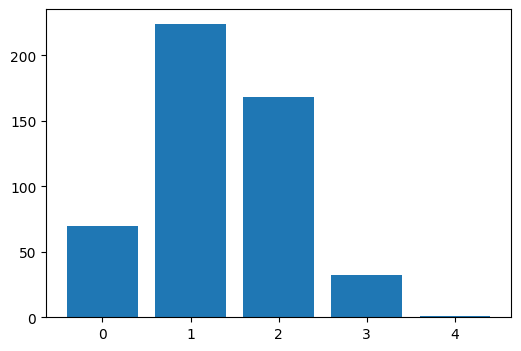

In [165]:
# Chart for the updated experiment
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(counts[0],counts[1]);

In [166]:
data = list(zip(*counts))
headers = ["Overlap Count", "Frequency"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+-----------------+-------------+
|   Overlap Count |   Frequency |
+=================+=============+
|               0 |          70 |
+-----------------+-------------+
|               1 |         224 |
+-----------------+-------------+
|               2 |         168 |
+-----------------+-------------+
|               3 |          32 |
+-----------------+-------------+
|               4 |           1 |
+-----------------+-------------+


In [167]:
# Number of times where the participant selects all the correct cups_milk
overlap_4 = dict(data).get(4, 0)
overlap_3 = dict(data).get(3, 0)
overlap_2 = dict(data).get(2, 0)

# Calculate the likeilhood of this happening
likelihood = overlap_4 / len(combs)
likelihood50 = (overlap_4 + overlap_3 +overlap_2) / len(combs)

print(f"The probability of the participant correctly identifying all cups by chance is {likelihood*100:.2f}%")
print(f"The probability of the participant selecting two or more cups by chance is {likelihood50*100:.2f}%")

The probability of the participant correctly identifying all cups by chance is 0.20%
The probability of the participant selecting two or more cups by chance is 40.61%


So, having rerun the experiement with a greater number of overall cups but the same amount of milk first cups, we can see a notable drop in the probability of the particpant both identifying all the milk first cups by chance but also a substantive drop in the likelihood of the probability of the participant selecting two or more cups by chance.

---
#### 3. Comparing the Two Experiments
---

The results from both experiments demonstrate a significant drop in the likelihood the participant will pick out a statistically significant number of cups correctly at random. This is especialy true both when it comes to identifying all the cups correctly (e.g 1.43% vs 0.20%) but it is also when it comes to selecting two or more milk first cups (e.g. 75.71% vs 40.61%). As the number of tea first cups increase while the number of milk first cups remain the same, it is increasingly difficult for the participant to pick out the relevant cucps at random.

This is a trend that we would expect to continue the more non-milk first cups we add to the total. Consequently, the more tea first cups added, the more statistically significant it will be if a participant manages to correctly identify all four milk first cups correctly. This has notable implications for the p-value. It represents the probability of obtaining results as extreme as, or more extreme than, the observed results under the assumption that the null hypothesis is true. Consequently, as the likelihood of success decreases dramatically, the argument for a relaxed p-value to reflect this change in circumstances increases. 

---
---

## **Problem 2: Normal Distribution**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Planche_de_Galton.jpg/1280px-Planche_de_Galton.jpg" alt="Tea Set" style="width: 600px; height: 400px;">

<small>By Antoine Taveneaux - Author's original own work (Original text: self-made, Mathematica, Inkscape), Public Domain, https://commons.wikimedia.org/w/index.php?curid=1613904<small>

---
### **Problem Description**
---

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

---
### **Answering the Problem**
___

The problem here is relatively straigh forward. There's a couple of steps that we need to take:
- First we need to establish the parameters and generate a random sample based off them. 
- Then we can compute the standard deviation with ddof = 1 and ddof = 2. 
- Plot the results of those two variances on the same histogram. 
- Analyise the results and infer what might happen to the results if the sample size is increased.

---
#### 1. Generating 100,000 samples of size 10
---
First off we need to actually generate the data so that we can establish the standard deviation. The problem description establishes the parameters.

In [168]:
# Establish the parameters
samples = 100000 # Number of samples
samplesize = 10 # Size of sample

# Create a numpy array with random numbers from the sample data
data = np.random.normal(0,1, (samples,samplesize)) # mean (0), standard deviation (1)

---
#### 2. Calculate the Standard Deviation
---
Now that the sample data has been properly prepared we can look at computing the standard deviation. We are calculating it on the basis of ddof = 0 (standard deviation for a population) and ddof = 1 (standard deviation for a sample).

In [169]:
sample_sd = np.std(data, ddof=1, axis=1) # ddof 1 (divide by (N)) - sample deviation
population_sd = np.std(data, ddof=0, axis=1) # ddof 0 (divide by (N-1)) - population - deviation

---
#### 3. Plot the Histogram
---
Now that we have our two datasets, we can plot each of them in a histogram to see how deviation in ddof impacts the distribution of the results.

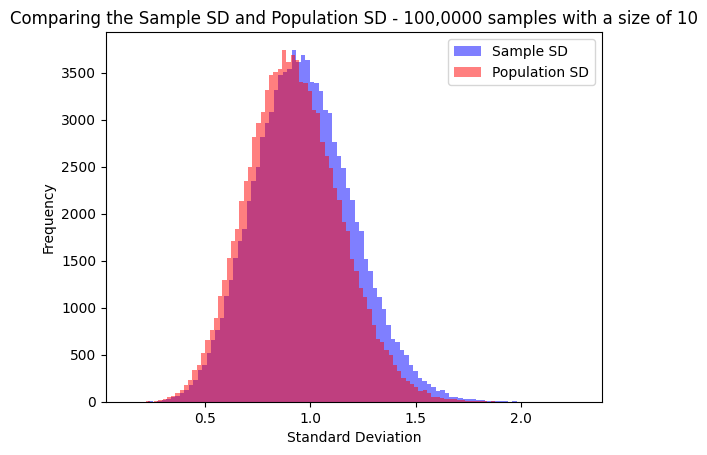

In [170]:
plt.hist(sample_sd, bins=100, alpha=0.5, label = "Sample SD", color = "blue") # set alpha to 0.5 to allow charts to overlap, applying a colour for clarity, bins set to 100 to allow for visability of non-overlapping data
plt.hist(population_sd, bins=100, alpha=0.5, label = "Population SD", color = "red") # same as above, different colour to ensure that the results are clear for both datasets
plt.xlabel ("Standard Deviation")
plt.ylabel("Frequency")
plt.title("Comparing the Sample SD and Population SD - 100,0000 samples with a size of 10")
plt.legend()


We can see that population_sd is shifted to the left of the historgram while sample_sd is shifted to the right and has a slightly broader set of results.

---
#### 4. Explaining the difference between the two standard deviations
---

The difference between the two comes down to divisor for both cases. population_sd is being divided by N (ddof = 0) while sample_sd is being divided by N-1 (ddof = 1). Due to this every point in population_sd is being divided by a larger number than sample_sd. As a result population_sd shifts to the left of the chart (where the standard deviation is on average smaller) while sample_sd shifts to the right (where it is larger). N-1 also introduces additionally variability compared to N, which tends to lead to a slightly larger variance and, by extension, a broader spread of results. population_sd assumes you have the data you have represents the whole population while sample_sd assumes you only have a sample of the overall population. The -1 is introduced in sample_sd is essentially a way of correcting for a small bias in the sample.

As to what happens to the gap when we increase the sample size, we would probably expect to see the gap reduce. N represents the sample size, in this instance 10. So in this instance N-1 would equal 9 If we were to increase our sample size to 100, N-1 would become 99. The relative gap between N and N-1 grows progressively smaller the larger N is (9 is 5% smaller than 10 while 99 is only 0.5% smaller than 99). Consequently, the greater N grows the less relative impact the -1 has on the difference between it and N. As a result, we would expect the population_sd and sample_sd to increasingly align in their results the larger N is, due to the increasingly smaller amount of variance between the two.

---
#### 5. Testing our hypothesis for the larger sample size
---

In [171]:
# Same code for the variables, except for sample size
samples = 100000
samplesize = 100 # Smple size increased to 100 from 10
data = np.random.normal(0,1, (samples,samplesize)) 


In [172]:
# Same code for generating the standard deviation
sample_sd = np.std(data, ddof=1, axis=1) 
population_sd = np.std(data, ddof=0, axis=1)

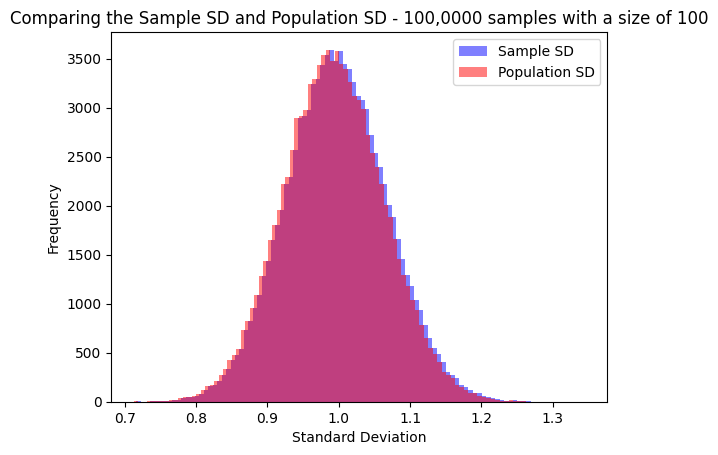

In [173]:
# All the same code for the histogram (except for the text related to the sample size)
plt.hist(sample_sd, bins=100, alpha=0.5, label = "Sample SD", color = "blue")
plt.hist(population_sd, bins=100, alpha=0.5, label = "Population SD", color = "red")
plt.xlabel ("Standard Deviation")
plt.ylabel("Frequency")
plt.title("Comparing the Sample SD and Population SD - 100,0000 samples with a size of 100")
plt.legend()

As we can see in the above example, when we increase the sample size, population_sd and sample_sd are much more aligned on the chart. Sample size consequently clearly has a significant impact on the variance between the two.

---
---

## **Problem 3: t-Tests**
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/One_sample_t-test.png" alt="t-test" style="width: 600px; height: 400px;">

<small>By Cornell User 2 - Author's original own work (Original text: self-made, Mathematica, Inkscape), Public Domain, https://commons.wikimedia.org/w/index.php?curid=140537165<small>

---
### **Problem Description**
---

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0 , 0.1 , 0.2 , … , 1.0 , repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d , and explain how the type II error rate changes as the difference in means increases.

---
### **Answering the Problem**
___

So, to answer this problem in full, we need to:
1. Generate two samples
2. Run indepent t-test on the samples
3. Graph the results
4. Explain the resuls

---
#### 1. Generating the samples
---

So, first we need to set the parameters of our test and our two samples, as provided by the project descriptions. That means establishing the number of times the simulation will run, the size of the two sample groups and d (the mean difference).

In [174]:
repeat = 1000 # no. of times the simulation is to be run
size = 100  # sample size per group
d_array = np.arange(0, 1.01, 0.1) # array of evenly spaced d mean difference values

---
#### 2. Running the t-tests
---

Now that we have the parameters for the samples defined, we can start trying to figure out the type 2 error rate for each value in d_array. To accomplish we're going to need to run the simulation so that we get the error rate for each value in d_array. Then, once we have those results, they will need to be stored in a list.

In [175]:
# List to store type 2 error rate
t2er=[] 

# Run the simulation for each size of d
for d in d_array:
    
    fails = 0 # Keeps track of the number of times the null hypthesis has been rejected for a mean difference value (d)

    # For the current d, repeat the simulation 1000 times
    for _ in range(repeat):
        x = np.random.normal(0, 1, size) # Independet sample with mean of 0
        y = np.random.normal(d, 1, size) # Independet sample with mean of d
        
        # Run an independent samples t-test on the two samples (x and y)
        p = ttest_ind(x, y).pvalue

        # Reject the null hypothesis if p is less than 0.05
        if p >= 0.05: 
            fails += 1
    
    t2er.append(fails / repeat) # Takes the total number of fails for each d value and divides it by the number of times the simulation was run (1000) to give us the overall failure rate for that d value

---
#### 3. Graphing the results
---

Now that we have our results for how the type 2 error rate we can graph how changes in the mean difference impact the type 2 error rate. Since both our d values their respective failure rates are stored as floats, trying to graph the results on a line chart would seem to make the most sense initially.

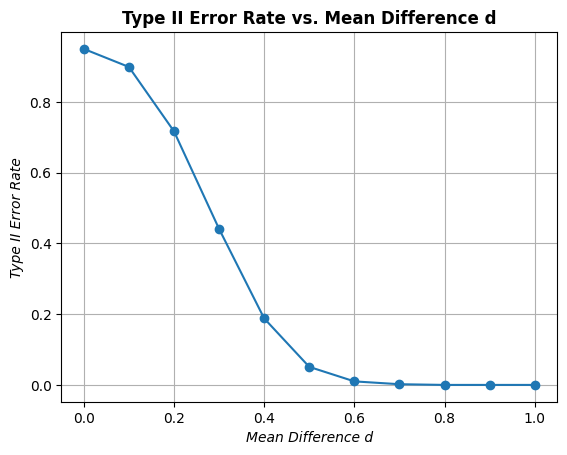

In [176]:
plt.plot(d_array, t2er, marker='o')
plt.xlabel("Mean Difference d", fontstyle='italic')
plt.ylabel("Type II Error Rate", fontstyle='italic')
plt.title("Type II Error Rate vs. Mean Difference d", fontweight='bold')
plt.grid(True) # Adding a grid to the graph to make it easy to identify where the points are a falling
plt.show()

---
#### 4. Explaining the changes in the type II error rate
---

Our results seem to indicate that the greater the mean difference the more likely the null hypothesis will be rejected. When d=0 the two groups are very similar, so the t-test struggles to identify a difference between the two samples, leading to a very high type 2 error rate. Comparatively at d=+0.7 the gap between the two is large enough that the t-test nearly always identifies the difference between the two. This trend is clearly identifiable in the graph, with the higher the means difference, the lower the type 2 error rate.

This largerly lines up with what we know about the impactof the effect size (in this instance the means difference) on type 2 error rates. Larger effect sizes are easier to detect while smaller effect sizes require larger sample sizes to achieve adequate power.

---
---

## **Problem 4: ANOVA**
<img src="https://upload.wikimedia.org/wikipedia/commons/4/4b/Anova%2C_no_fit..png" alt="ANOVA Test - No fit: Young vs old, and short-haired vs long-haired" style="width: 600px; height: 400px;">

<small>By Vanderlindenma - Author's original own work, Public Domain, https://commons.wikimedia.org/w/index.php?curid=140537165<small>

---
### **Description of the problem**
---

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

- Perform a one-way ANOVA to test whether all three means are equal.
- Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
- Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

---
### **Answering the Problem**
---

This problem is a little more complex and requires a few more steps that the previous one:
1. Generate the three samples
2. Preform the ANOVA test
3. Preform the three independent two-sample t-tests
4. Compare the conclusions
5. Discuss why ANOVA is preferred based off these conclusions


---
#### 1. Generating three samples
---

To start off, we need to generate three samples we are actually going to be analysing. As per the problem description, each of needs to be of size 30, from normal distributions with each of the three having a different means (0, 0.5, and 1) but the same standard deviation (1).

In [177]:
np.random.seed(345) # Setting a fixed seed so that the results don't change every time we run the notebook.

# Three samples
sample_a = np.random.normal(loc=0.0, scale=1.0, size=30) # mean = 0
sample_b = np.random.normal(loc=0.5, scale=1.0, size=30) # mean = 0.5
sample_c = np.random.normal(loc=1.0, scale=1.0, size=30) # mean = 1

We're this oportunity to establish a value for the alpha for our experiment. We're going to go with an alpha level of 0.05, which is, generally, the standard significance level used for this type of exercise.

In [178]:
# set an alpha
alpha = 0.05

# Quick function to check if a given p-value is above or below the alpha level and, by extension, whether or not the null hypothesis has been rejected.
def check_null(p_value, alpha=alpha):
    if p_value < alpha:
        print(f"The null hypothesis is rejected.")
    else:
        print(f"Failed to reject the null hypothesis.")

---
#### 2. Preforming the ANOVA test
---

Now that we have our three samples, we can start on our first test, the ANOVA test. Thankfully, scipy.stats has a built in function for this which we can enter our three samples into directly.

In [179]:
# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(sample_a, sample_b, sample_c)

Next we pull out the p-value from the results and see if it rejects the null hypothesis that all three samples are equal. We could also pull out the f-stat but we will leave this out for the moment, as our analysis is not focusing on it.

In [180]:
# Show the results
print(f"When it comes to the above three samples, the results of the ANOVA test indicate that the p value is \033[1m{p_value:.6f}\033[0m.")

# Check if the null hypothesis is rejected
check_null(p_value)

When it comes to the above three samples, the results of the ANOVA test indicate that the p value is 0.000714.
The null hypothesis is rejected.


The ANOVA test has rejected the null hypothesis, which means that at least one of the three groups is different from the others.

---
#### 3. Preforming the three independent t-tests
---

With the ANOVA test done, we can get started on the t-tests. As per the problem description, we have three groups we're comparing here: sample a vs b, sample a vs c and sample b vs c. We can use the sample ttest_ind function that we used in problem 3 to analyse these one at a time.

In [181]:
ttab, p_value0 = stats.ttest_ind(sample_a, sample_b) # t-test sample a vs b
ttac, p_value1 = stats.ttest_ind(sample_a, sample_c) # t-test sample a vs c
ttbc, p_value2 = stats.ttest_ind(sample_b, sample_c) # t-test sample b vs c

Much like with the ANOVA test above, we can now pull out the p-values from the tests and see which groups reject the null hypothesis and which do not.

In [182]:
# a vs b results
print(f"For a vs b: The p value is \033[1m{p_value0:.6f}\033[0m.")
check_null(p_value0)
print("\n")

# a vs c results
print(f"For a vs c: The p value is \033[1m{p_value1:.6f}\033[0m.")
check_null(p_value1)
print("\n")

# b vs c results
print(f"For b vs c: The p value is \033[1m{p_value2:.6f}\033[0m.")
check_null(p_value2)

For a vs b: The p value is 0.006594.
The null hypothesis is rejected.


For a vs c: The p value is 0.000374.
The null hypothesis is rejected.


For b vs c: The p value is 0.261637.
Failed to reject the null hypothesis.


Two out of the three groups have rejected the null hypothesis. However, by extension, this means that one of the groups (b vs c) failed to reject the null hypothesis.

---
#### 4. Comparing the conclusions
---

The ANOVA test rejected the null hypothesis, which, in this case, would seem to indicate that the sample mean groups are not all equal. In contrast, in our three independent t-tests only groups a vs b and a vs c seem to reject the null hypothesis. Group b vs c returns a value substantively above 0.05. The data does not seem provide enough evidence to conclude that the means of sample a and sample b are statistically different.

On one hand, the two results are not necessarily contradictory. All the ANOVA tests demonstrates is that at least one of the two groups' means are likely to be different. The t-tests seem to indicate that it is like that a and b and a and c are different. So, to a large degree, our results complement one another. However, they also demonstrate that t-tests on their own are more likely to be subject to individual variability. 

---
#### 5. Why is ANOVA preferred over several t-tests?
---

There's a couple of reasons that ANOVA is often prefered over t-tests. In the case of our particular example, two points in particular stand out:

- **ANOVA is better at handling multiple groups**

    As you can see above, one key advantage of runing an ANOVA test over multiple t-tests is that it is simply much quicker and easier. After preperaing our samples, running the ANOVA test only required one line of code, while preforming the t-tests took three. The more groups involved in an experiment the greater the discrepency between the two approaches. Running t-tests for each pair can quickly become cumbersome, with each additional line of code increasing the chances of an error being made. Comparing multiple groups simultaneous via ANOVA reduces this workload and risk substantively. In doing so, you greatly reduce the possibility of making Type I errors.

- **ANOVA has greater statistical power**

    One other key advantage ANOVA has over t-test is its greater statistical power, particularily when dealing with multiple groups. Statistical power refers to the ability of a test to detect a true effect when it exists. As it considers the variance within and between groups simulteaneously, ANOVA is better able to capture the overall variability in the data. This leads to it generating more reliable results than what you would recieve by running multiple independent t-tests. Researchers are, consequently, able to detect smaller effects with greater confidence.

In summation, when it comes to looking at multiple groups, ANOVA is both less work and more reliable when it comes tpo capturing variability in the data. This is not to say that it is not without its faults (for example, ANOVA is often more sensitve to outliers). However, when it comes to our particular problem, ANOVA is the better tool for the job.




---
---

# END